In [1]:
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
input_shape = (28, 28, 1)

4422102/4422102 [==============================] - 0s 0us/step


Я добавил дополнительный слой нейронов и изменил алгоритм с relu на selu, плюс добавил регуляризацию к полносвязному слою.

In [6]:
model = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, kernel_size=(3, 3), activation='selu', padding='same'),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(64, kernel_size=(3, 3), activation='selu', padding='same'),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(128, kernel_size=(3, 3), activation='selu', padding='same'),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(256, kernel_size=(3, 3), activation='selu', padding='same'),
      MaxPooling2D(pool_size=(2, 2)),
      Flatten(),
      Dense(256, activation='selu', kernel_regularizer=l2(0.001)),
      Dense(10, activation='softmax'),
    ])

In [7]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, batch_size=32,
                    epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 173s 92ms/step - loss: 0.5157 - accuracy: 0.8528 - val_loss: 0.3776 - val_accuracy: 0.8761
Epoch 2/10
1875/1875 [==============================] - 162s 86ms/step - loss: 0.2993 - accuracy: 0.9003 - val_loss: 0.3214 - val_accuracy: 0.8947
Epoch 3/10
1875/1875 [==============================] - 162s 86ms/step - loss: 0.2463 - accuracy: 0.9173 - val_loss: 0.2900 - val_accuracy: 0.9008
Epoch 4/10
1875/1875 [==============================] - 161s 86ms/step - loss: 0.2142 - accuracy: 0.9283 - val_loss: 0.3095 - val_accuracy: 0.8985
Epoch 5/10
1875/1875 [==============================] - 168s 89ms/step - loss: 0.1836 - accuracy: 0.9393 - val_loss: 0.3054 - val_accuracy: 0.9059
Epoch 6/10
1875/1875 [==============================] - 162s 87ms/step - loss: 0.1642 - accuracy: 0.9467 - val_loss: 0.3871 - val_accuracy: 0.8868
Epoch 7/10
1875/1875 [==============================] - 166s 89ms/step - loss: 0.1381 - accuracy: 0.9555 - val_loss: 0

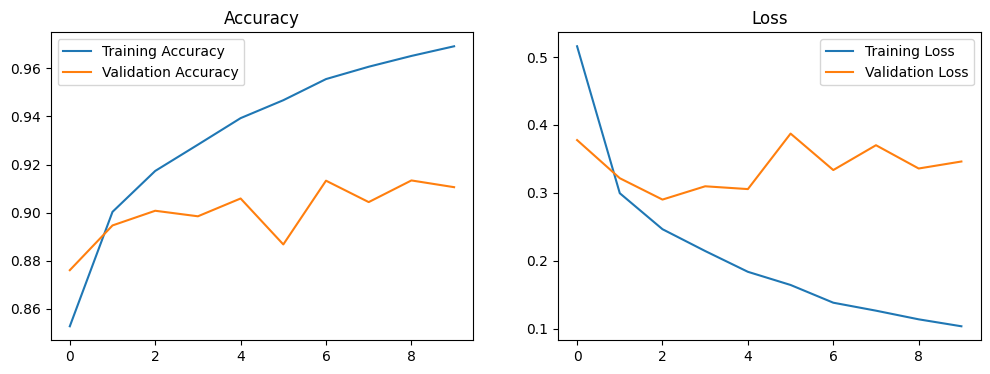

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 3, 3, 128)        

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

model.summary()